In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [3]:
url=pd.read_csv('/Users/jon/Desktop/Ironhack/Unit 4 - Statistics & Probability/amz_uk_price_prediction_dataset.csv')

In [4]:
df= pd.DataFrame(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [23]:
#Part 1: Analyzing Best_Seller Trend Across Product Cartegories

#1. Crosstab Analysis

#Craete a crosstab between the product category and the best seller status
crosstab = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0).sort_values(by=True, ascending=False)*100
crosstab, crosstab_percentage

print("Those categories with the highest percentage of best sellers are:")
print(crosstab_percentage[crosstab_percentage[True] > 4].index.tolist())

Those categories with the highest percentage of best sellers are:
['Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care', 'Mobile Phone Accessories']


In [29]:
#2. Statistical Tests

#Chi-Squared Test of Independence

chi2_statistic, chi2_p_value,_,_=chi2_contingency(crosstab)
print(f'{chi2_statistic}, {chi2_p_value}')


36540.202700613874, 0.0


In [36]:
#cramer's V for association strength

association_strength = association(crosstab, method='cramer')
print(f'Association Strength (Cramer\'s V): {association_strength}')
print("The association strength is low, indicating that the relationship between product category and best seller status is weak.")


Association Strength (Cramer's V): 0.12228294397605641
The association strength is low, indicating that the relationship between product category and best seller status is weak.


<Figure size 1200x600 with 0 Axes>

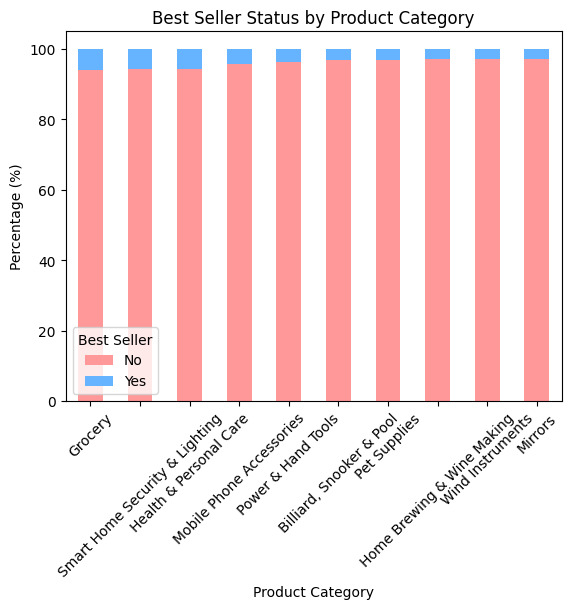

In [38]:
#3. Visualizations
#Top 10 Categories
top_categories = crosstab_percentage.head(10)

#Stacked Bar Chart
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'])



plt.title('Best Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Best Seller', labels=['No', 'Yes'])

In [45]:
#Part 2: Exploring Product Prices and Ratings Across Caregories and Brands

#create df removing outliers in product prices using IQR method

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_filtered


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<Axes: xlabel='category', ylabel='price'>

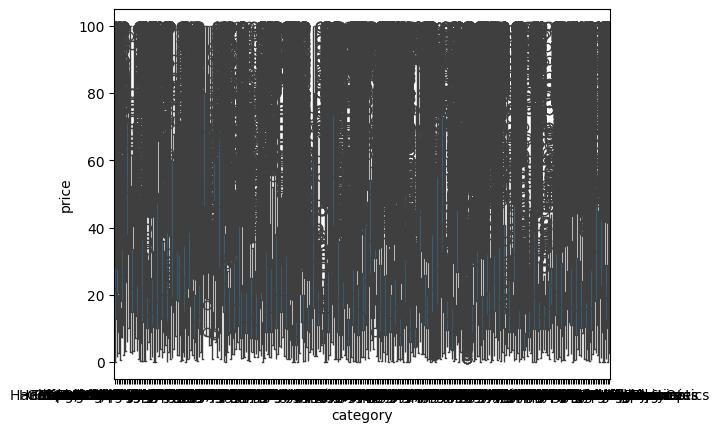

In [48]:
df_filtered["price"].describe()

sns.boxplot(x='category', y='price', data=df_filtered)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

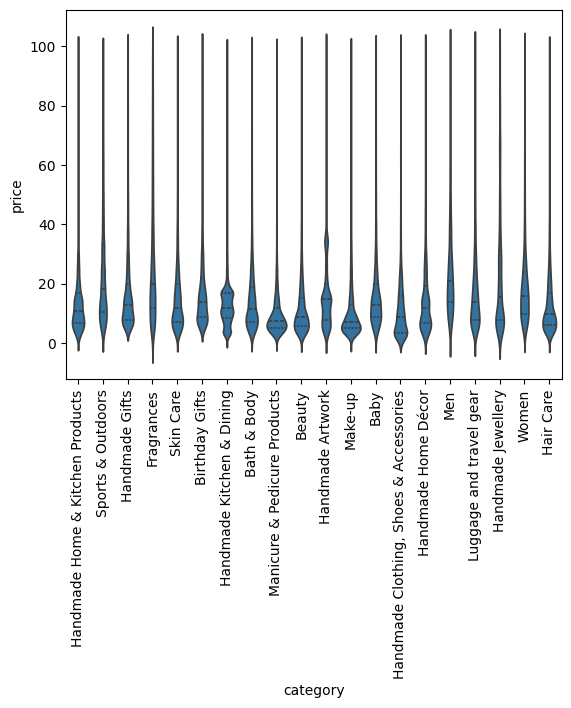

In [73]:
#1. Violin Plots

#create df with top 20 categories by count
top_20_categories = df_filtered['category'].value_counts().nlargest(20).index


df_top_20_categories = df_filtered[df_filtered['category'].isin(top_20_categories)]

sns.violinplot(x='category', y='price', data=df_top_20_categories, inner='quartile')
plt.xticks(rotation=90)



In [72]:
df_filtered.groupby("category")["price"].median().sort_values(ascending=False)

print("The top 5 categories with the highest median price are:")
print(df_filtered.groupby("category")["price"].median().sort_values(ascending=False).head(5).index.tolist())


The top 5 categories with the highest median price are:
['Desktop PCs', 'Boxing Shoes', 'Tablets', 'Graphics Cards', 'Motherboards']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Fragrances'),
  Text(1, 0, 'Men'),
  Text(2, 0, 'Sports & Outdoors'),
  Text(3, 0, 'Handmade Jewellery'),
  Text(4, 0, 'Women'),
  Text(5, 0, 'Luggage and travel gear'),
  Text(6, 0, 'Birthday Gifts'),
  Text(7, 0, 'Handmade Artwork'),
  Text(8, 0, 'Handmade Gifts'),
  Text(9, 0, 'Baby'),
  Text(10, 0, 'Skin Care'),
  Text(11, 0, 'Handmade Home Décor'),
  Text(12, 0, 'Bath & Body'),
  Text(13, 0, 'Handmade Home & Kitchen Products'),
  Text(14, 0, 'Hair Care'),
  Text(15, 0, 'Handmade Kitchen & Dining'),
  Text(16, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(17, 0, 'Beauty'),
  Text(18, 0, 'Make-up'),
  Text(19, 0, 'Manicure & Pedicure Products')])

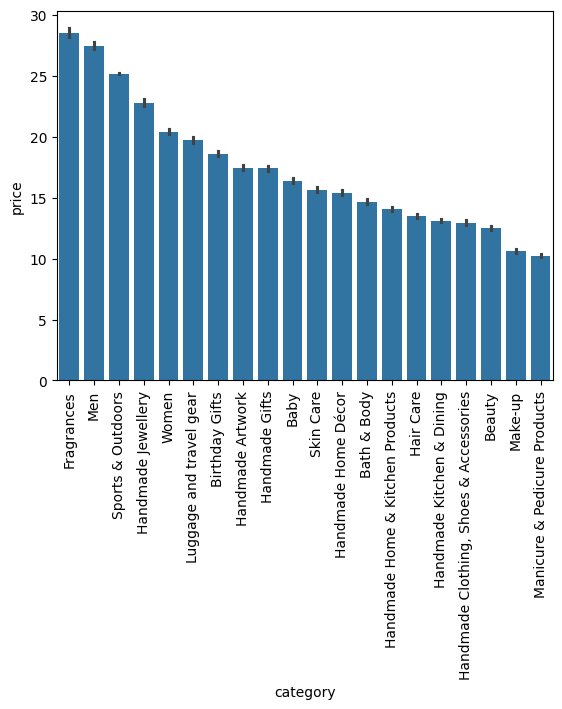

In [81]:
#2. BarCharts

#Create df for top 10 categories by count

top_10_categories = df_filtered['category'].value_counts().nlargest(20).index


df_top_10_categories = df_filtered[df_filtered['category'].isin(top_10_categories)]
mean_price=df_top_10_categories.groupby("category")["price"].mean().sort_values(ascending=False)

sns.barplot(x='category', y="price", data=df_top_10_categories, estimator=np.mean, order=mean_price.index)
plt.xticks(rotation=90)



In [84]:
highest_mean_price = df_filtered.groupby("category")["price"].mean().sort_values(ascending=False).head(5)
print("The top 5 categories with the highest mean price are:")
print(highest_mean_price.index.tolist())

The top 5 categories with the highest mean price are:
['Motherboards', 'Boxing Shoes', 'Desktop PCs', 'Tablets', 'Graphics Cards']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

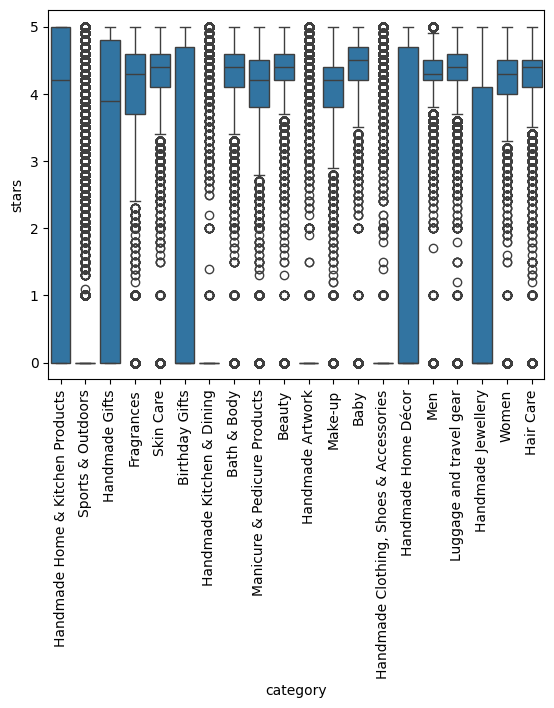

In [95]:
#3. Box Plots



sns.boxplot(x="category", y="stars", data=df_top_10_categories, orient='v')
plt.xticks(rotation=90)

In [96]:
highest_median_stars = df_filtered.groupby("category")["stars"].mean().sort_values(ascending=False).head(5)
print("The top 5 categories with the highest median stars are:")
print(highest_median_stars.index.tolist())

The top 5 categories with the highest median stars are:
['Luxury Food & Drink', 'Grocery', 'Laptop Accessories', 'Health & Personal Care', 'Arts & Crafts']


In [ ]:
#Part 3: Investigating the Interplay between Product Ratings and Prices

#1. Correlation coefficient

correlation_pearson = df_filtered['price'].corr(df_filtered['stars']) # Pearson correlation coefficient
correlation_spearman = df_filtered['price'].corr(df_filtered['stars'], method='spearman') # Spearman correlation coefficient
print(f'Pearson correlation coefficient: {correlation_pearson}')
print(f'Spearman correlation coefficient: {correlation_spearman}')

print("The correlation between both variables is slightly negative but very close to 0 suggesting the correlation might not exists although we can't come to the concluion yet.")


Pearson correlation coefficient: -0.07767299878181001
Spearman correlation coefficient: -0.06679697280769055


<Axes: xlabel='price', ylabel='stars'>

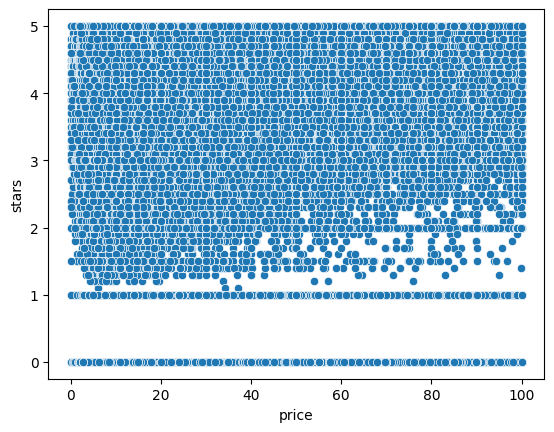

In [100]:
#2. Scatter Plot

sns.scatterplot(x="price", y="stars", data=df_filtered)

print("The prices are very distributes throughout the range of stars, suggesting that there is no clear relationship between price and ratings. However, we can see that most products are priced between 0 and 100, with a few outliers at higher prices.")



Text(0.5, 1.0, 'Correlation Heatmap between Price and Stars')

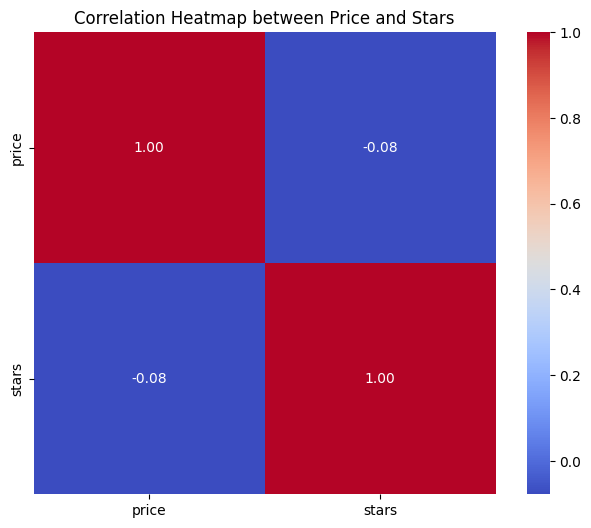

In [101]:
#Correlation heatmap
correlation_heatmap = df_filtered[['price', 'stars']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap between Price and Stars')

The plots shows us that the first quartiles are much more heavily populated and the last quartiles are much less populated compared to the Theoreticl Qunatiles, suggesting that the distribution of prices doesn't follwo a normal distribution.


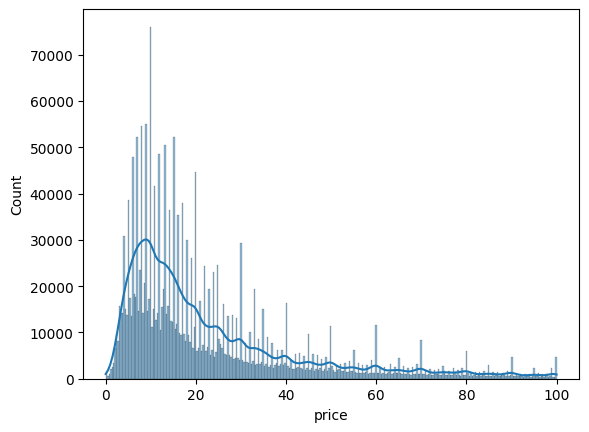

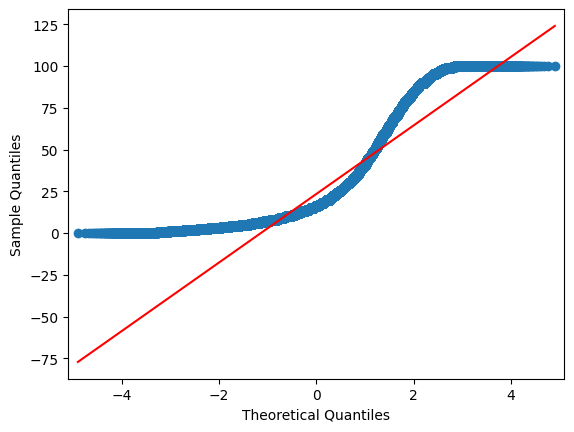

In [106]:
# Examine if product prices are normally distributed using qq plot

import statsmodels.api as sm

sns.histplot(df_filtered['price'], kde=True)

sm.qqplot(df_filtered['price'], line='s')

print("The plots shows us that the first quartiles are much more heavily populated and the last quartiles are much less populated compared to the Theoreticl Qunatiles, suggesting that the distribution of prices doesn't follwo a normal distribution.")